In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

### Acknowlegment:

This following series of notebooks use directly the datasets and logic provided by Johannes Mauritzen on his github page (https://jmaurit.github.io/). I follow his methods closely. The series of lectures, which inspired my notebooks use the R language, so I instead adapted his methodology into Python myself. This acknolegments page applies to all subsequent notebooks on this repository. The choice of `.ipynb` felt more natural and easier than an Object Oriented approach, as the latter is not necessary here. 

## Relational Data, Exploration and Financials in petroleum firms

The majority of datasets will not be complete. Instead, various datasets from various sources are combined to get so-called *Relational data*. 

The dataset under consideration here concerns itself with petroleum exploration activity on the Norwegian Continental Shelf. Data on exploration is combined with firm-level financial data. How does the financial situation affect drilling decisions? Which firms do the risky exploratory drilling on the Norwegian Continental Shelf? What is the relationship between the firm's profitability and its drilling activities? 

The data is from the Norwegian Petroleum Directon all exploratory wells drilled on the Norwegian Continental Shelf in the past 10 years.

In [178]:
exploration = pd.read_csv("wellbore_exploration_last_10_years.csv")

In [5]:
exploration.describe()

,wlbWellboreName,wlbEntryDate,wlbCompletionDate,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbContent,wlbReentry,wlbStatus,wlbAgeAtTd,wlbAgeWithHc1,datesyncNPD
count,491,491,485,491,491,491,479,491,491,491,271,491
unique,491,463,454,49,251,2,10,2,6,25,22,1
top,25/4-14 B,03.03.2015,26.12.2014,Statoil Petroleum AS,501,WILDCAT,DRY,NO,P&A,EARLY JURASSIC,MIDDLE JURASSIC,23.09.2019
freq,1,3,3,118,21,336,177,487,453,91,82,491


In [7]:
exploration[['wlbEntryDate', 'wlbCompletionDate']]

,wlbEntryDate,wlbCompletionDate
0,17.09.2019,NaN
1,10.09.2019,16.09.2019
2,09.09.2019,NaN
3,30.08.2019,NaN
4,30.08.2019,NaN
...,...,...
486,19.12.2009,25.01.2010
487,01.12.2009,22.07.2010
488,30.11.2009,21.01.2010
489,18.11.2009,03.01.2010


These dates should be in `datetime` format

In [179]:
exploration['wlbEntryDate'] = pd.to_datetime(exploration['wlbEntryDate'])
exploration['wlbCompletionDate'] = pd.to_datetime(exploration['wlbCompletionDate'])
exploration['datesyncNPD'] = pd.to_datetime(exploration['datesyncNPD'])

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_43232/4156025165.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  exploration['wlbEntryDate'] = pd.to_datetime(exploration['wlbEntryDate'])
/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_43232/4156025165.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  exploration['wlbCompletionDate'] = pd.to_datetime(exploration['wlbCompletionDate'])
/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_43232/4156025165.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  exploration['datesyncNPD'] = pd.to_datetime(exploration['datesyncNPD'])


In [11]:
exploration

,wlbWellboreName,wlbEntryDate,wlbCompletionDate,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbContent,wlbReentry,wlbStatus,wlbAgeAtTd,wlbAgeWithHc1,datesyncNPD
0,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,NaN,2019-09-23
1,25/4-14 A,2019-09-10,2019-09-16,Aker BP ASA,036 C,APPRAISAL,NaN,NO,PLUGGED,,NaN,2019-09-23
2,32/4-2,2019-09-09,NaT,Equinor Energy AS,921,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23
3,2/1-17 S,2019-08-30,NaT,Aker BP ASA,019 C,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23
4,6507/5-9 S,2019-08-30,NaT,PGNiG Upstream Norway AS,838,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...
486,34/4-12 S,2009-12-19,2010-01-25,Statoil Petroleum AS,057,WILDCAT,OIL,NO,P&A,LATE TRIASSIC,LATE TRIASSIC,2019-09-23
487,1/3-12 S,2009-12-01,2010-07-22,BG Norge AS,297,WILDCAT,DRY,NO,P&A,LATE TRIASSIC,NaN,2019-09-23
488,16/1-13,2009-11-30,2010-01-21,Lundin Norway AS,338,APPRAISAL,OIL,NO,P&A,LATE TRIASSIC,EARLY CRETACEOUS,2019-09-23
489,15/9-23,2009-11-18,2010-01-03,Det norske oljeselskap ASA (old),408,WILDCAT,DRY,NO,P&A,LATE TRIASSIC,NaN,2019-09-23


The column `wlbPurpose` contains the following two categories:

- `Wildcat` is exploratory drilling, to find if there is delivery.
- `Appraisal` is post-discovery, to find how large a field is and its composition.

The column `wlbContent` provides information on what was found in the well, if anything.

In [17]:
exploration.groupby(['wlbPurpose']).size().reset_index(name='count')

,wlbPurpose,count
0,APPRAISAL,155
1,WILDCAT,336


In [14]:
exploration.groupby(['wlbPurpose', 'wlbContent']).size().reset_index(name='count')

,wlbPurpose,wlbContent,count
0,APPRAISAL,DRY,19
1,APPRAISAL,GAS,10
2,APPRAISAL,GAS/CONDENSATE,3
3,APPRAISAL,NOT APPLICABLE,5
4,APPRAISAL,NOT AVAILABLE,1
5,APPRAISAL,OIL,75
6,APPRAISAL,OIL SHOWS,2
7,APPRAISAL,OIL/GAS,32
8,APPRAISAL,SHOWS,3
9,WILDCAT,DRY,158


`Condensate`: natural gas condensate, i.e. natural gas in liquid form. 

`Shows`: trace amounts of hydrocarbons (little found)

`Dry`: wells where nothing is found 

We see the **majority of wildcat drilling is risky**, majority of wells are dry (158 out of 336 wildcat wells). Let us visualise this information with a bar chart.

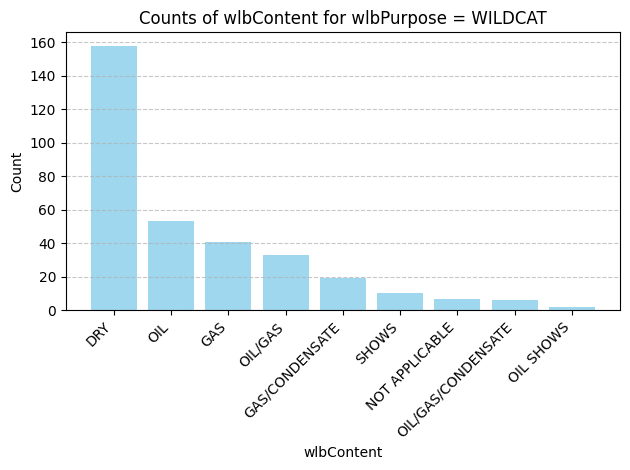

In [27]:
plt.bar(exploration[exploration['wlbPurpose']=='WILDCAT'].groupby('wlbContent').size().reset_index(name='counts').sort_values(by='counts', ascending=False)['wlbContent'], exploration[exploration['wlbPurpose']=='WILDCAT'].groupby('wlbContent').size().reset_index(name='counts').sort_values(by='counts', ascending=False)['counts'], color='skyblue', alpha=0.8)
plt.xlabel('wlbContent')
plt.ylabel('Count')
plt.title('Counts of wlbContent for wlbPurpose = WILDCAT')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

We add a `year` feature in `exploration` using `wlbEntryDate`

In [180]:
exploration['year'] = exploration['wlbEntryDate'].dt.year

Find the number of wells drilled per year, given by the `wlbEntryDate` year

In [32]:
exploration.head()

,wlbWellboreName,wlbEntryDate,wlbCompletionDate,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbContent,wlbReentry,wlbStatus,wlbAgeAtTd,wlbAgeWithHc1,datesyncNPD,year
0,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,NaN,2019-09-23,2019
1,25/4-14 A,2019-09-10,2019-09-16,Aker BP ASA,036 C,APPRAISAL,NaN,NO,PLUGGED,,NaN,2019-09-23,2019
2,32/4-2,2019-09-09,NaT,Equinor Energy AS,921,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019
3,2/1-17 S,2019-08-30,NaT,Aker BP ASA,019 C,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019
4,6507/5-9 S,2019-08-30,NaT,PGNiG Upstream Norway AS,838,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019


In [34]:
exploration.groupby('year').size().reset_index(name='number_wells')

,year,number_wells
0,2009,5
1,2010,46
2,2011,52
3,2012,43
4,2013,59
5,2014,57
6,2015,56
7,2016,38
8,2017,36
9,2018,53


There were very few wells in 2009, given the large losses endured by oil producers following the oil crisis when the crude oil futures dipped from around $140/bbl to around $40/bbl. Stimulus packages in China managed to save demand for commodities, and a short time later, prices soared again. 

Plot a bar chart considering only the `Wildcat` category, still count/year

In [36]:
exploration[exploration['wlbPurpose']=='WILDCAT'].groupby('year').size().reset_index(name='number_wells')


,year,number_wells
0,2009,4
1,2010,34
2,2011,35
3,2012,27
4,2013,42
5,2014,41
6,2015,39
7,2016,29
8,2017,24
9,2018,28


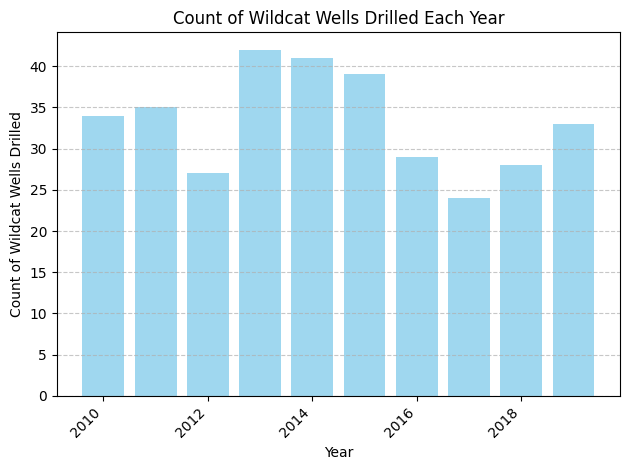

In [39]:
plt.bar(exploration[exploration['wlbPurpose']=='WILDCAT'].groupby('year').size().reset_index(name='number_wells').iloc[1:]['year'], exploration[exploration['wlbPurpose']=='WILDCAT'].groupby('year').size().reset_index(name='number_wells').iloc[1:]['number_wells'], color='skyblue', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Count of Wildcat Wells Drilled')
plt.title('Count of Wildcat Wells Drilled Each Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In the previous part, we saw that the price of Brent dropped singificantly from the 2013 average of around $100/bbl when it halved to an average $50/bbl in 2015. This led to a decrease in CAPEX, which is expressed here as a decreased count of exploratory wells drilled each year. This is a way for production firms to increase their margins and be more profitable. This may lead to increased share buybacks by management. 

### Analysis of equity, cash and debt plot from Part 2 and relating it to wildcat well production

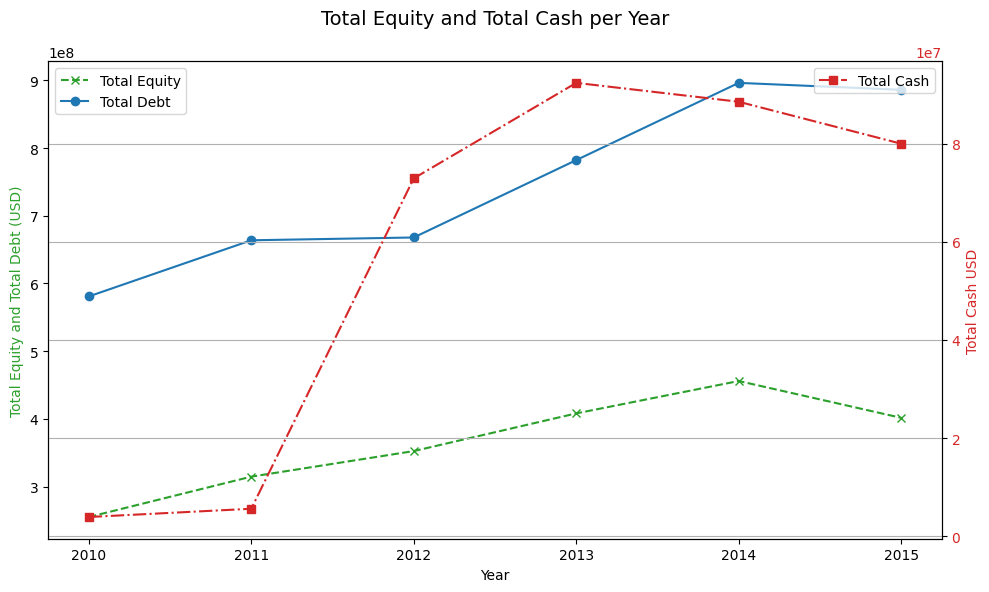

1. Debt shows a steady increase from 2010 to 2014. Firms may be leveraging to finance large projects, in anticipation of rising oil pricesor future growth.
2. Equity also grows steadily but begins to also decrease in 2015. While firms were reinvesting profits into capital projects, there may have been a shift in capital allocation toward debt or buybacks in 2015.
3. Cash levels jumped sharply from 2011 to 2013. This may reflect strong operational cash flows due to favourable oil prices or asset sales. The decline post-2013 could indicate firms used cash to pay down debt, fund operations or return capital to shareholders. 


Increasing debt and stable equity from 2010 to 2014 shows firms preferred leverage over equity issuance to finance growth. The equity decline in 2015 corresponds to the sharp fall in oil prices when firms reduced investment in capital projects, shift from growth to survival mode. The cash drop also corresponds to when oil prices declined. 

Between 2010-2014, exploration activity of wildcat wells increased. Post-201', as oil prices tumbled, exploration activity declined sharply (low point of 24 in 2017 during period of low prices). 

Wildcat drilling still shows high wildcat well drilling (39 over 2015), even though oil price had already significantly decreased to around $50/bbl. This lag could be explained by pre-existing commitments to projects initiated before prices fell. Continued drilling despite the low price environment may be explained by will to secure reserves, while the rest of the industry is not competing for drilling. 

### Matching exploration data (`exploration`) with company financial data ( `AS_data`)

Hypothesis is that the decision to drill an exploratory well is linked to the financial condition of a drilling company. We import company data similar to that in Section 2.

In [40]:
AS_data = pd.read_csv("accounting_cleanData.csv")

The `AS_data` also includes the company name, just like in `exploration` dataset `wlbDrillingOperator`, but it may prove difficult to match the company names in the presence of typos and different naming conventions. It does contain a company ID, which identifies the company in the Norwegian company register. We attempt to match the company ID with the Norwegian Petroleum Directorate ID for companies active in the NCS. This data is obtained from the NPD webpages and download it in a cleaner format from jmaurit's github page. A new `company` DataFrame is created.

In [78]:
exploration.head()

,wlbWellboreName,wlbEntryDate,wlbCompletionDate,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbContent,wlbReentry,wlbStatus,wlbAgeAtTd,wlbAgeWithHc1,datesyncNPD,year
0,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,NaN,2019-09-23,2019
1,25/4-14 A,2019-09-10,2019-09-16,Aker BP ASA,036 C,APPRAISAL,NaN,NO,PLUGGED,,NaN,2019-09-23,2019
2,32/4-2,2019-09-09,NaT,Equinor Energy AS,921,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019
3,2/1-17 S,2019-08-30,NaT,Aker BP ASA,019 C,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019
4,6507/5-9 S,2019-08-30,NaT,PGNiG Upstream Norway AS,838,WILDCAT,NaN,NO,DRILLING,,NaN,2019-09-23,2019


In [181]:
company = pd.read_csv("company.csv")

In [61]:
company.iloc[773]['Orgnr']

5894683.0

In [62]:
company.iloc[450]['Orgnr']

946680591.0

These company IDs in Norwegian register do not seem to all have the same lengths. Change type to `str` and ensure what lengths are in the Series

`Orgnr` is the company ID in Norwegian register (float64)

`NPD_id` is the NPD company ID (int64)

Check if all non-missing values are whole numbers (integers). Despite the column being of type `float64`, there are no fractional parts in any of its values.

In [64]:
company['Orgnr'].dropna().apply(float.is_integer).all()

True

In [182]:
# change type to integer to remove the .0 decimal point
company['Orgnr'] = company['Orgnr'].astype('Int64')
# change again to string type to compare lengths of IDs
company['Orgnr'] = company['Orgnr'].astype(str)

In [74]:
company['Orgnr'].str.len().value_counts()

Orgnr
9    432
4    322
7     18
6      5
Name: count, dtype: int64

There are four unique lengths of IDs

In [48]:
"""
if company['Orgnr'].dropna().apply(float.is_integer).all():
    company['Orgnr'] = company['Orgnr'].astype('Int64')

else:
    company['Orgnr'] = company['Orgnr'].astype(str)
"""

In [75]:
AS_data['comp_id'].astype(str).str.len().value_counts()

comp_id
9    14311
Name: count, dtype: int64

In [217]:
AS_data['comp_id'] = AS_data['comp_id'].astype(str)
AS_merged = company[['Orgnr', 'NPD_id', 'LongName', 'ShortName']].merge(AS_data, how='inner', left_on='Orgnr', right_on='comp_id')

`AS_data` only contains company IDs of length 9, `company` contains company IDs of other lengths

In [183]:
license = pd.read_csv("licence.csv")

we can match companies using `NPD_id` inside `AS_data` with `cmpNpdidCompany` in `license` DataFrame

Steps
1. merge `exploration` data with `license` data (both share NPD ids)
2. then merge that with company financials `AS_data` 

Assign simpler names to column names

In [184]:
new_column_names = [
    "prlName",
    "ValidFrom",
    "ValidTo",
    "LongName",
    "licenseeInterest",
    "licenseeSdfi",
    "operValidFrom",
    "operDateValidTo",
    "NpdidLicence",
    "cmpNpdidCompany",
    "LicenseeDateUpdated",
    "DatesyncNPD"
]

license.columns = new_column_names


Format the variables giving us the dates during which licenses are valid.

In [185]:
license['ValidFrom'] = pd.to_datetime(license['ValidFrom'], dayfirst=True)
license['ValidTo'] = pd.to_datetime(license['ValidTo'], dayfirst=True)

In [186]:
license['ValidTo'].isna().sum()

1702

We can see that `ValidTo` is usually a `NaN` value when the `ValidFrom` value is quite recent, indicating that the license is liekly still valid to this day.

In [121]:
license[['ValidFrom', 'ValidTo']][license['ValidTo'].isna()]

,ValidFrom,ValidTo
0,2019-08-01,NaT
1,2019-08-01,NaT
6,2018-12-04,NaT
7,2018-12-04,NaT
8,2018-12-04,NaT
...,...,...
26337,2019-03-01,NaT
26338,2019-03-01,NaT
26339,2019-03-01,NaT
26340,2019-03-01,NaT


Verify the range of `ValidTo` to understand when the dataset seems to stop.

In [122]:
license['ValidTo'].min(), license['ValidTo'].max()

(Timestamp('1967-01-01 00:00:00'), Timestamp('2019-12-10 00:00:00'))

Replace `NaN` values in `ValidTo` to `2020-01-01` the very end of the year. `2019-12-10` (Dec. 10) is the last recorded data of the dataset.

In [187]:
license['ValidTo'] = license['ValidTo'].fillna(pd.to_datetime('2020-01-01'))

No remaining missing values in column `ValidTo`

In [127]:
license[license['ValidTo'].isna()]

,prlName,ValidFrom,ValidTo,LongName,licenseeInterest,licenseeSdfi,operValidFrom,operDateValidTo,NpdidLicence,cmpNpdidCompany,LicenseeDateUpdated,DatesyncNPD


### Joining exploration and license datasets

Match on production license, but also on the date. There are, however, two date columns in the `license` dataset, `ValidFrom` and `ValidTo`. This can be solved by ensuring that the well-bore entry date (`wlbEntryDate` in `exploration`) is found within the valid from and to dates

In [188]:
z = pd.DataFrame(exploration['wlbProductionLicence']).merge(pd.DataFrame(license['prlName']), how='left', left_on='wlbProductionLicence', right_on='prlName')
z = pd.DataFrame(z)
z = z.reset_index()

# CHECK WHY NO CORRESPONDING `prlName` to license '057' found in `wlbProductionLicence`
# even though '057' exists in 'prlName' but it appears as though the code 
# does not match them 
print(z)
z.iloc[3005]['wlbProductionLicence']


      index wlbProductionLicence prlName
0         0                036 C   036 C
1         1                036 C   036 C
2         2                036 C   036 C
3         3                036 C   036 C
4         4                036 C   036 C
...     ...                  ...     ...
3005   3005                 057      NaN
3006   3006                 297      NaN
3007   3007                 338      NaN
3008   3008                 408      NaN
3009   3009                 375      NaN

[3010 rows x 3 columns]


'057 '

We see for example that some of the entries in `wlbProductionLicence` have no match in the `prlName` column of `licence` DataFrame. We can check that such an entry should indeed exist in `prlName` (e.g. 057) yet there is no match post-merge

In [175]:
license.query("prlName == '057'").head()

,prlName,ValidFrom,ValidTo,LongName,licenseeInterest,licenseeSdfi,operValidFrom,operDateValidTo,NpdidLicence,cmpNpdidCompany,LicenseeDateUpdated,DatesyncNPD
4829,057,2019-11-13,2020-01-01,Wintershall Dea Norge AS,24.5,NaN,NaN,NaN,21252,35318843,18.11.2019,02.01.2020
4830,057,2019-11-13,2020-01-01,Vår Energi AS,4.9,NaN,NaN,NaN,21252,33360957,18.11.2019,02.01.2020
4831,057,2019-11-13,2020-01-01,Equinor Energy AS,31.0,NaN,16.05.2018,NaN,21252,32011216,18.11.2019,02.01.2020
4832,057,2019-11-13,2020-01-01,Petoro AS,30.0,NaN,NaN,NaN,21252,1626839,18.11.2019,02.01.2020
4833,057,2019-11-13,2020-01-01,Idemitsu Petroleum Norge AS,9.6,NaN,NaN,NaN,21252,441,18.11.2019,02.01.2020


This indicates that the merge is affected by the space after `057 ` from the `wlbProductionLicence` column. We clean both columns by removiing leading/ trailing spaces and ensuring the same format

In [189]:
exploration['wlbProductionLicence'] = exploration['wlbProductionLicence'].str.strip()
license['prlName'] = license['prlName'].str.strip()

# ensure both columns are strings 
exploration['wlbProductionLicence'] = exploration['wlbProductionLicence'].astype(str)
license['prlName'] = license['prlName'].astype(str)

In [190]:
# test the left merge once again on the columns only to see if the matching produces any more NaN values
z = pd.DataFrame(exploration['wlbProductionLicence']).merge(pd.DataFrame(license['prlName']), how='left', left_on='wlbProductionLicence', right_on='prlName')
z = pd.DataFrame(z)
z = z.reset_index()
z

,index,wlbProductionLicence,prlName
0,0,036 C,036 C
1,1,036 C,036 C
2,2,036 C,036 C
3,3,036 C,036 C
4,4,036 C,036 C
...,...,...,...
15706,15706,375,375
15707,15707,375,375
15708,15708,375,375
15709,15709,375,375


In [288]:
license.head()

,prlName,ValidFrom,ValidTo,LongName,licenseeInterest,licenseeSdfi,operValidFrom,operDateValidTo,NpdidLicence,cmpNpdidCompany,LicenseeDateUpdated,DatesyncNPD
0,001,2019-08-01,2020-01-01,Mime Petroleum AS,10.0,NaN,NaN,NaN,20756,29491564,02.10.2019,02.01.2020
1,001,2019-08-01,2020-01-01,Vår Energi AS,90.0,NaN,10.12.2018,NaN,20756,33360957,02.10.2019,02.01.2020
2,001,2018-12-10,2019-08-01,Vår Energi AS,100.0,NaN,10.12.2018,NaN,20756,33360957,02.10.2019,02.01.2020
3,001,2017-11-01,2018-12-10,Point Resources AS,100.0,NaN,01.11.2017,09.12.2018,20756,28183464,02.10.2019,02.01.2020
4,001,2004-10-01,2017-11-01,ExxonMobil Exploration and Production Norway AS,100.0,NaN,01.10.2004,31.10.2017,20756,2835212,02.10.2019,02.01.2020


In [191]:
z.isna().sum()

index                   0
wlbProductionLicence    0
prlName                 0
dtype: int64

There are now zero `NaN` values from merging the two columns under consideration. We can therefore merge the entire DataFrames now.

1. We match the exploration and license data using a left join based on the production license (`wlbProductionLicence` and `prlName`)

In [192]:
expl_lic = exploration.merge(license, how='left', left_on='wlbProductionLicence', right_on='prlName')

2. `validFrom` <= `wlbEntryDate` <= `ValidTo`

In [193]:
expl_lic_filtered = expl_lic[(expl_lic['wlbEntryDate'] >= expl_lic['ValidFrom']) & (expl_lic['wlbEntryDate'] <= expl_lic['ValidTo'])]

3. inspect the left merged dataset

In [197]:
expl_lic_filtered.head()

,wlbWellboreName,wlbEntryDate,wlbCompletionDate,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbContent,wlbReentry,wlbStatus,wlbAgeAtTd,...,ValidTo,LongName,licenseeInterest,licenseeSdfi,operValidFrom,operDateValidTo,NpdidLicence,cmpNpdidCompany,LicenseeDateUpdated,DatesyncNPD
0,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,...,2020-01-01,Aker BP ASA,65.0,NaN,30.09.2016,NaN,2473241,28544099,02.10.2019,02.01.2020
1,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,...,2020-01-01,ConocoPhillips Skandinavia AS,20.0,NaN,NaN,NaN,2473241,2410696,02.10.2019,02.01.2020
2,25/4-14 B,2019-09-17,NaT,Aker BP ASA,036 C,APPRAISAL,NaN,NO,DRILLING,,...,2020-01-01,Lundin Norway AS,15.0,NaN,NaN,NaN,2473241,2767314,02.10.2019,02.01.2020
25,25/4-14 A,2019-09-10,2019-09-16,Aker BP ASA,036 C,APPRAISAL,NaN,NO,PLUGGED,,...,2020-01-01,Aker BP ASA,65.0,NaN,30.09.2016,NaN,2473241,28544099,02.10.2019,02.01.2020
26,25/4-14 A,2019-09-10,2019-09-16,Aker BP ASA,036 C,APPRAISAL,NaN,NO,PLUGGED,,...,2020-01-01,ConocoPhillips Skandinavia AS,20.0,NaN,NaN,NaN,2473241,2410696,02.10.2019,02.01.2020


We see that the same `wlbProductionLicence` shares multiple `LongName` company names. According to Johannes Mauritzen, this is caused by shared ownership. In other words, each well-bore has mutliple shared owners (detailed in `LongName`), but a single drilling operator (`wlbDrillingOperator`). We verify the existence of a single operator per drilling well by checking duplicates.

5. Group by `wlbProductionLicence` 

In [209]:
# count unique drilling operators per production license
drilling_operator_counts = expl_lic_filtered.groupby('wlbProductionLicence')['wlbDrillingOperator'].nunique().reset_index()
multiple_operators_licenses = drilling_operator_counts[drilling_operator_counts['wlbDrillingOperator'] > 1]

filtered_multiple_operators = expl_lic_filtered[expl_lic_filtered['wlbProductionLicence'].isin(multiple_operators_licenses['wlbProductionLicence'])]

# count how many times each drilling operators appears per multiple_license
operator_value_counts = filtered_multiple_operators.groupby(['wlbProductionLicence', 'wlbDrillingOperator']).size()

# Display the operator counts to see which production licences have more than one operator
operator_value_counts

wlbProductionLicence  wlbDrillingOperator             
120                   Equinor Energy AS                    8
                      Statoil Petroleum AS                12
159 B                 Equinor Energy AS                    5
                      Statoil Petroleum AS                 4
167                   Equinor Energy AS                    6
                      Statoil Petroleum AS                 2
212                   Aker BP ASA                          4
                      BP Norge AS                          4
248 C                 Equinor Energy AS                    3
                      Statoil Petroleum AS                 2
373 S                 A/S Norske Shell                     4
                      BG Norge AS                         20
375                   Petro-Canada Norge AS                5
                      Suncor Energy Norge AS               2
378                   Wintershall Norge AS                 4
                      Wintersh

For example, in this DataFrame, we see that Equinor has drilled 8 wells on license `120` and Statoil has drilled 12 wells on the same license.

6. To simplify things, select rows where the License Owner is the same as the Drilling Operator

In [294]:
expl_oper = expl_lic_filtered[expl_lic_filtered['wlbDrillingOperator']==expl_lic_filtered['LongName']].reset_index()

In [296]:
print(expl_lic['LongName'])
print(expl_oper['LongName'])


0                          Aker BP ASA
1        ConocoPhillips Skandinavia AS
2                     Lundin Norway AS
3           Det norske oljeselskap ASA
4        ConocoPhillips Skandinavia AS
                     ...              
15706                 Revus Energy ASA
15707             Premier Oil Norge AS
15708                 Revus Energy ASA
15709             Premier Oil Norge AS
15710          Petro-Canada UK Limited
Name: LongName, Length: 15711, dtype: object
0                           Aker BP ASA
1                           Aker BP ASA
2                     Equinor Energy AS
3                           Aker BP ASA
4              PGNiG Upstream Norway AS
                     ...               
483                Statoil Petroleum AS
484                         BG Norge AS
485                    Lundin Norway AS
486    Det norske oljeselskap ASA (old)
487               Petro-Canada Norge AS
Name: LongName, Length: 488, dtype: object


By doing this operation where only drilling operators are also the license owner of that well, we drop almost all of the rows.

7. Change the column title for NPD ID column, to match that of `AS_data`

In [214]:
expl_oper = expl_oper.rename(columns={'cmpNpdidCompany':'NPD_id'})

8. Match exploration and financial data and join

In [239]:
expl_AS = pd.merge(expl_oper, AS_merged, how='left', on=['NPD_id', 'year'])

There are duplicates in `expl_AS` but do not remove them yet as they may be to various wells operated by the same company. We can have multiple observations for the same company in the same year. Instead, we are interested in the company as the unit of measurement.

Aggregating the exploration data to the company-year level. 

Calculating the number of exploration wells per company per year by counting the number of `wlbWellboreName`

In [248]:
compWells = expl_oper.groupby(['NPD_id','year'])['wlbWellboreName'].count().reset_index(name='numbWells')

In [255]:
compWells.sort_values(by=['year', 'NPD_id'])

,NPD_id,year,numbWells
34,2747354,2009,1
39,2767314,2009,9
54,3960945,2009,6
80,4539989,2009,2
95,17237817,2009,4
...,...,...,...
133,26464257,2019,5
135,26464449,2019,14
141,28544099,2019,42
142,29394105,2019,2


In [250]:
compWells

,NPD_id,year,numbWells
0,441,2011,5
1,463,2011,6
2,562,2010,24
3,562,2013,9
4,562,2014,15
...,...,...,...
143,30382333,2017,1
144,30382333,2018,9
145,32011216,2018,21
146,32011216,2019,29


In [324]:
# expl_AS = pd.merge(expl_oper, AS_merged, how='left', on=['NPD_id', 'year'])
explAgg_AS = pd.merge(compWells, AS_merged, how='left', on=['NPD_id', 'year'])

### Analysis of exploration and company financials

- *Hypothesis we'd like to test*: bigger firms (in total assets) will drill more wells

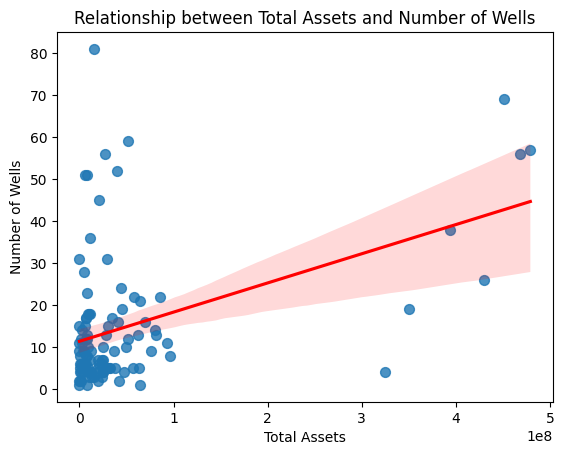

In [258]:
sns.regplot(
    data=explAgg_AS,
    x='total_assets',
    y='numbWells',
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}
)
plt.xlabel('Total Assets')
plt.ylabel('Number of Wells')
plt.title('Relationship between Total Assets and Number of Wells')

# Show the plot
plt.show()

There is correlation here but with a lot of variance around the regression line. In other words, some small companies drill a lot and some big companies drill little.

In [263]:
explAgg_AS[['LongName', 'ShortName']]

,LongName,ShortName
0,Idemitsu Petroleum Norge AS,IDEMITSU
1,Marathon Petroleum Norge AS,MARATHON N
2,A/S Norske Shell,SHELL NORGE
3,A/S Norske Shell,SHELL NORGE
4,A/S Norske Shell,SHELL NORGE
...,...,...
143,Spirit Energy Norge AS,SPIRIT ENERGY NORGE
144,Spirit Energy Norge AS,SPIRIT ENERGY NORGE
145,Equinor Energy AS,EQUINOR ENERGY AS
146,NaN,NaN


In [265]:
type(explAgg_AS['NPD_id'][0])

numpy.int64

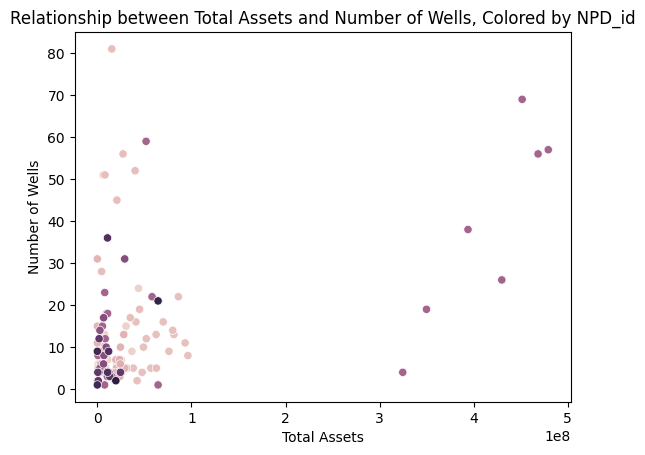

In [275]:
sns.scatterplot(
    data=explAgg_AS,
    x='total_assets',
    y='numbWells',
    hue='NPD_id',
    legend=False
)

plt.xlabel('Total Assets')
plt.ylabel('Number of Wells')
plt.title('Relationship between Total Assets and Number of Wells, Colored by NPD_id')

# Show the plot
plt.show()

All points with large total assets belong to the same company, where each dot represents a different year. Look up the company

In [284]:
print(explAgg_AS.query("LongName == 'Equinor Energy AS'")['total_assets'])
print(explAgg_AS.query("LongName == 'Statoil Petroleum AS'")['total_assets'])

145    64545000.0
Name: total_assets, dtype: float64
95     324624000.0
96     349843000.0
97     393945000.0
98     429878000.0
99     451515000.0
100    479271000.0
101    468429000.0
102     51789000.0
103     58153000.0
104     64545000.0
Name: total_assets, dtype: float64


Explore why there is only one data point for `Equinor` but many data points for `Statoil`... what got lost...?

In [277]:
explAgg_AS[explAgg_AS['total_assets']>3e8]['LongName'].unique()

,NPD_id,year,numbWells,Orgnr,LongName,ShortName,comp_id,status,employees,founded_date,...,inventory_capital,dividend,accounts_payable,rental_costs,wage_costs,total_operating_costs,total_current_assets,profit,change_inventories,total_equity.
95,17237817,2009,4,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,0.0,NaN,191000.0,NaN,0.0,73533000.0,29994000.0,22064000.0,0,67538000.0
96,17237817,2010,19,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,417000.0,NaN,311000.0,NaN,0.0,78434000.0,45025000.0,28146000.0,0,70886000.0
97,17237817,2011,38,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,3000.0,NaN,1084000.0,NaN,0.0,79963000.0,56712000.0,57599000.0,0,79036000.0
98,17237817,2012,26,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,0.0,NaN,641000.0,NaN,0.0,76774000.0,35383000.0,44576000.0,0,86127000.0
99,17237817,2013,69,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,0.0,NaN,430000.0,NaN,0.0,94562000.0,54121000.0,39347000.0,0,174328000.0
100,17237817,2014,57,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,0.0,NaN,12296000.0,NaN,0.0,89094000.0,62510000.0,8813000.0,0,205510000.0
101,17237817,2015,56,990888213,Statoil Petroleum AS,STATOIL PETROLEUM AS,990888213,Aktivt,0.0,01.02.2007,...,0.0,NaN,7644000.0,NaN,0.0,100992000.0,28057000.0,-44462000.0,0,175883000.0


Now let's look at profitability instead of total assets

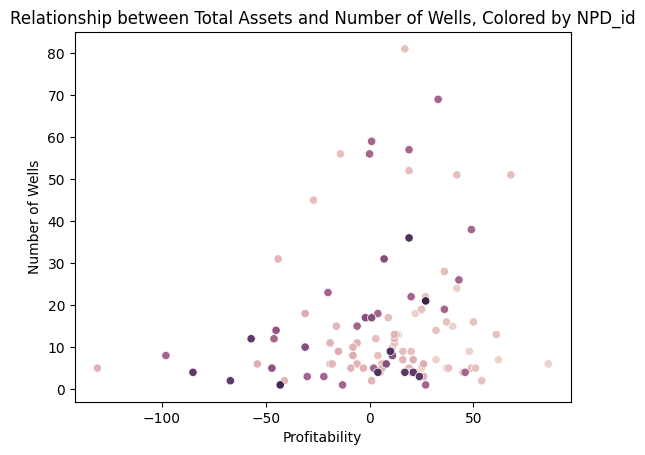

In [286]:
sns.scatterplot(
    data=explAgg_AS,
    x='profitability',
    y='numbWells',
    hue='NPD_id',
    legend=False
)

plt.xlabel('Profitability')
plt.ylabel('Number of Wells')
plt.title('Relationship between Total Assets and Number of Wells, Colored by NPD_id')

# Show the plot
plt.show()

There appears to be a correlation between number of wells explored and profitability of the firm: more profitable firms tend to drill more. Very unprofitably tend to drill very little for obvious reasons.

### Review of Regression

In [325]:
explAgg_AS['total_assets_scaled'] = explAgg_AS['total_assets'] / 1000000
explAgg_AS['profitability_scaled'] = explAgg_AS['profitability'] / 1000

In [328]:
explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled'])

total_assets_scaled     41
profitability_scaled    44
dtype: int64

In [329]:
explAgg_AS['numbWells'].isna().sum()

0

In [330]:
X = explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled'])[['total_assets_scaled', 'profitability_scaled']]
X = sm.add_constant(X)
y = explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled'])['numbWells']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              numbWells   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     11.68
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.74e-05
Time:                        17:51:27   Log-Likelihood:                -425.88
No. Observations:                 104   AIC:                             857.8
Df Residuals:                     101   BIC:                             865.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5998 

- 18.8% of the variability in `numbWells` is explained by the model (17.2% if we account for the number of predictors in the model)
- Low p-value (0.0000274) so we reject the null hypothesis, that all regression coefficients are equal to zero. The model is statistically significant overall.
- The regression model indicates that `total_assets_scaled` is a significant predictor of the number of wells, while `profitability_scaled` does not show a statistically significant effect.

### Include all numeric variables (before selecting a few predictors only)

Let's include more variables and see which ones may be useful in predicting the number of wells. Of course, those can only be numeric so we only leave out the ones in text or use binary representation if it is appropriate.

In [342]:
numeric_only = explAgg_AS.select_dtypes(include=['int64', 'float64']).drop(columns=['numbWells'])

In [343]:
numeric_only = numeric_only.drop(columns=['comp_num', 'dividend','liquidity', 'employees', 'accounts_payable'])

In [346]:
data = pd.concat([explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled'])['numbWells'], numeric_only], axis=1).dropna()

y = data['numbWells']
X = data.drop(columns=['numbWells'])
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              numbWells   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     3.932
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.79e-06
Time:                        18:17:25   Log-Likelihood:                -335.84
No. Observations:                  88   AIC:                             719.7
Df Residuals:                      64   BIC:                             779.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.69

**Interpretation**:

- Relationship between `numbWells` and 23 independent variables
- R-squared value of 0.586 means a moderate to strong fit. Meaningful relationship
- Many variables are not contributing significantly to the model (multicollinearity or overfitting)
- The residuals are not normally distributed.
- High multicollinearity is illustrated here... this gives inflated standard errors, unreliable coefficient estimates. Since there are only 88 observations and 23 predictors, we need much fewer predictors. This gives rise a smaller condition number. This is just an illustration, I would select much fewer predictors normally. 

### Additional predictors to consider for the regression

In [350]:
explAgg_AS['zip']

0      1366.0
1      4020.0
2      4056.0
3      4056.0
4      4056.0
        ...  
143    4007.0
144    4007.0
145    4035.0
146       NaN
147    4007.0
Name: zip, Length: 148, dtype: float64

In [353]:
X = explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled', 'employees', 'share_capital', 'sales_revenue', 'pre_tax_profits', 'zip'])[['total_assets_scaled', 'profitability_scaled', 'employees', 'share_capital', 'sales_revenue', 'pre_tax_profits', 'zip']]
X = sm.add_constant(X)
y = explAgg_AS.dropna(subset=['total_assets_scaled', 'profitability_scaled', 'employees', 'share_capital', 'sales_revenue', 'pre_tax_profits', 'zip'])['numbWells']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              numbWells   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     10.25
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.20e-09
Time:                        18:49:10   Log-Likelihood:                -384.49
No. Observations:                  98   AIC:                             785.0
Df Residuals:                      90   BIC:                             805.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.0266 

- For each additional employee, number of well decreases by 0.0067, holding other variables constant. This negative relationship is statistically significant. This may indicate that more employees might be associated with fewer wells, e.g. efficiency losses in company
- 

Let us now visualise some time series trends with our data

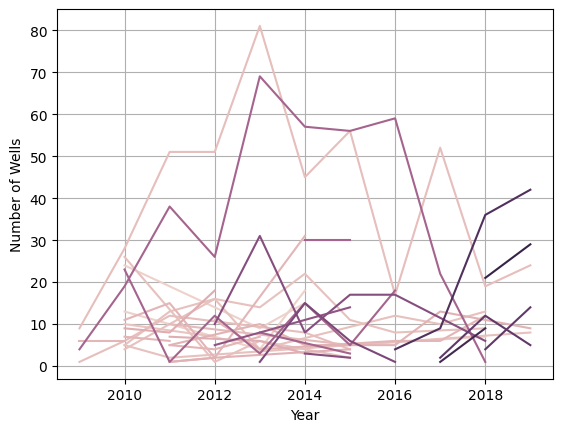

In [287]:
sns.lineplot(
    data=explAgg_AS,
    x='year', 
    y='numbWells',
    hue='NPD_id',
    legend=False
    )
plt.xlabel('Year')
plt.ylabel('Number of Wells')
plt.grid(True)
plt.show()

- A few companies are responsible for the vest majority of the drilling. Many sub-20 wells per year companies. These big firms isgnificantly ramped up their drilling from 2009 until 2013 and have reduced their drilling until 2016-2018

- As the share of the drilling by big companies decreases, the share taken by smaller producers seems to ramp up, particularly after 2016.

